In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='6b250d97-ac88-4d26-a53f-2c092c17d3e4', project_access_token='p-2f99d0a6a31485cd55462f1d793c35782778b8fc')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn==0.23.2 --upgrade

     |████████████████████████████████| 6.8MB 7.2MB/s eta 0:00:01
     |████████████████████████████████| 307kB 45.3MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [3]:
!pip install pandas==1.1.1 --upgrade

     |████████████████████████████████| 10.5MB 5.6MB/s eta 0:00:01
ERROR: ibm-watson-machine-learning 1.0.10 has requirement pandas<=0.25.3, but you'll have pandas 1.1.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: pandas 0.24.1
    Uninstalling pandas-0.24.1:
      Successfully uninstalled pandas-0.24.1


In [4]:
!pip install seaborn==0.10.1 --upgrade

     |████████████████████████████████| 225kB 9.0MB/s eta 0:00:01
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


In [5]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 9.4MB/s eta 0:00:01


<hr>

## Loading the .csv dataset from GitHub

In [76]:
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, roc_auc_score

from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv

--2020-09-11 20:16:22--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376 (90K) [text/plain]
Saving to: ‘ForTraining.csv’

100%[======================================>] 92,376      --.-K/s   in 0.02s   

2020-09-11 20:16:22 (4.57 MB/s) - ‘ForTraining.csv’ saved [92376/92376]



In [8]:
df_base_for_training = pd.read_csv(r'ForTraining.csv')

In [ ]:
df_base_for_training.head()

In [ ]:
df_base_for_training.Graduado.value_counts()

Descripción: La primera tabla mostrada arriba tiene 4 columnas, 3 son features and el target: `Graduado` that has a binary values={Si, No}.

Usted puede, y debe, usar mas data que esta disponible para construir su modelo. Los siguientes archivos .csv presentados:

In [9]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv

--2020-09-11 20:16:24--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63920 (62K) [text/plain]
Saving to: ‘OrdenMaterias.csv’

100%[======================================>] 63,920      --.-K/s   in 0.004s  

2020-09-11 20:16:24 (16.8 MB/s) - ‘OrdenMaterias.csv’ saved [63920/63920]



In [10]:
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')

In [ ]:
df_orden_materias.head()

In [11]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv

--2020-09-11 20:16:27--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243492 (238K) [text/plain]
Saving to: ‘TablaConexiones.csv’

100%[======================================>] 243,492     --.-K/s   in 0.01s   

2020-09-11 20:16:28 (23.1 MB/s) - ‘TablaConexiones.csv’ saved [243492/243492]



In [12]:
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')

In [ ]:
df_tabla_conexiones.head()

In [13]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv

--2020-09-11 20:16:31--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310923 (304K) [text/plain]
Saving to: ‘TablaTareas.csv’

100%[======================================>] 310,923     --.-K/s   in 0.01s   

2020-09-11 20:16:31 (23.7 MB/s) - ‘TablaTareas.csv’ saved [310923/310923]



In [14]:
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')

In [ ]:
df_tabla_tareas.head()

Overview del Dataset:

    Disponibles para el participante, ecisten 4 tables cargas en DataFrames anteriormente:
    
    **df_base_for_training**
        - ``studentId``
        ``reducido``
        ``ciclo``
        ``Graduado`` --> ¡LA VARIABLE OBJETIVO PARA CLASIFICACIÓN BINARIA!
        
    **df_orden_materias**
        ``reducido``
        ``2017 - 03``
        ``2017 - 04``
        ``2017 - 05``
        ``2017 - 06``
        ``2017 - 07``
        ``2017 - 08``
        ``2018 - 01``
        ``2018 - 02``
        ``2018 - 03``
        ``2018 - 04``
        ``2018 - 05``
        ``2018 - 06``
        ``2018 - 07``
        ``2018 - 08``
        ``2019 - 01``
        ``2019 - 02``
        ``2019 - 03``
        ``2019 - 04``
        ``2019 - 05``
        ``2019 - 06``
        ``2019 - 07``
        ``2019 - 08``
        ``2020 - 01``
        ``2020 - 02``
        ``2020 - 03``
        ``2020 - 04``
        ``2020 - 05``
        ``2020 - 06``
        
    **df_tabla_conexiones**
        - ``studentId``
        ``ciclo``
        ``Dias_Conectado``
        ``Minutos_Promedio``
        ``Minutos_Total``
        
    **df_tabla_tareas**
        - ``studentId``
        ``ciclo``
        ``Calificacion_Promedio``
        ``Tareas_Puntuales``
        ``Tareas_No_Entregadas``
        ``Tareas_Retrasadas``
        ``Total_Tareas``
        
Observe que la variable ``studentId`` aparece en varias tablas.

Usted puede combinar/merge estos datasets como usted desee.

#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

In [ ]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\n\nColumnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\n\nColumnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\n\nColumnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

### OverSampling Class

In [15]:
class OverSamplingDataSet():
    def __init__(self, target):
        self.target = target

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        data = pd.DataFrame(X.copy())

        graduated_count, not_graduated_count = data.value_counts([self.target])

        graduated_df = data[data[self.target] == 'Si']
        not_graduated_df = data[data[self.target] == 'No']

        graduated_over_df = not_graduated_df.sample(graduated_count, random_state=337, replace=True)
        return pd.concat([graduated_df, graduated_over_df], axis=0)

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [16]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

df = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88


In [ ]:
print("Valores nulos del dataSet: \n\n{}\n".format(df.isnull().sum(axis = 0)))

### Calcular la media de los dias conectado

In [ ]:
promedio_dias = df['Dias_Conectado'].sum() / len(df.Dias_Conectado)
df['Media_Dias'] = df.apply(lambda row: (row.Dias_Conectado / promedio_dias), axis = 1)

promedio_minutos = df['Minutos_Total'].sum() / len(df.Minutos_Total)
df['Media_Minutos'] = df.apply(lambda row: (row.Minutos_Total / promedio_minutos), axis = 1)

promedio_minutos_t = df['Minutos_Promedio'].sum() / len(df.Minutos_Promedio)
df['Media_Minutos_T'] = df.apply(lambda row: (row.Minutos_Promedio / promedio_minutos_t), axis = 1)

df.head()

### DF auxiliar para calcular 'score' de las tareas

In [ ]:
ts = pd.DataFrame()
ts['Tareas_score_good'] = df.apply(lambda row: (row.Tareas_Puntuales / row.Total_Tareas), axis = 1)
ts['Tareas_score_plus'] = df.apply(lambda row: (row.Tareas_Retrasadas / row.Total_Tareas), axis = 1)
ts['Tareas_score_bad'] = df.apply(lambda row: (row.Tareas_No_Entregadas / row.Total_Tareas), axis = 1)
ts.head()

### Calcular un puntaje total de tareas 

In [ ]:
df['Tareas_score'] = ts.apply(lambda row: (row.Tareas_score_good + ( row.Tareas_score_plus * 0.5 ) - row.Tareas_score_bad), axis = 1)
df.head()

## Pre-procesando el dataset antes de entrenar

### Eliminando columnas no desadas

In [17]:
df3 = df.drop(columns=['studentId', 'reducido'], inplace=False)
df3.head()

,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40
1,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87
2,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79
3,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22
4,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72


In [18]:
print("Cols: ", len(df3.columns), " Rows: ", len(df3))

Cols:  10  Rows:  2500


<hr>

### Manejando variables Categoricas


No graduados: 1220
Graduados: 1280
Proportion: 1.05 : 1


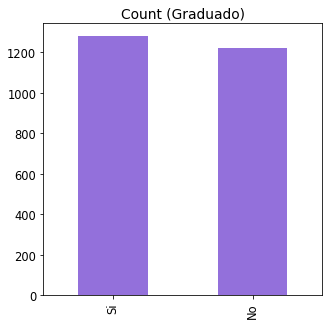

In [19]:
plt.rcParams.update({'figure.figsize': (5.0, 5.0)})
plt.rcParams.update({'font.size': 11.5})

target_count = df3.Graduado.value_counts()

print('No graduados:', target_count['No'])
print('Graduados:', target_count['Si'])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Graduado)', color='mediumpurple');

In [20]:
enc = OneHotEncoder()
ohenc = pd.DataFrame(enc.fit_transform(df3[['ciclo']]).toarray()).add_prefix('enc_')
df4 = df3.iloc[:, 1:].join(ohenc)
df4.head()

,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,enc_0,...,enc_12,enc_13,enc_14,enc_15,enc_16,enc_17,enc_18,enc_19,enc_20,enc_21
0,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print("Cols: ", len(df4.columns), " Rows: ", len(df3))

Cols:  31  Rows:  2500


#### Label encoder

In [23]:
le = LabelEncoder()
target_label = pd.DataFrame(le.fit_transform(df4['Graduado']))
df4.drop(columns=['Graduado'], inplace=True)
df4['Graduado'] = target_label

In [24]:
df4.head()

,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,enc_0,enc_1,...,enc_13,enc_14,enc_15,enc_16,enc_17,enc_18,enc_19,enc_20,enc_21,Graduado
0,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [25]:
#### Correlacion de caracteristicas

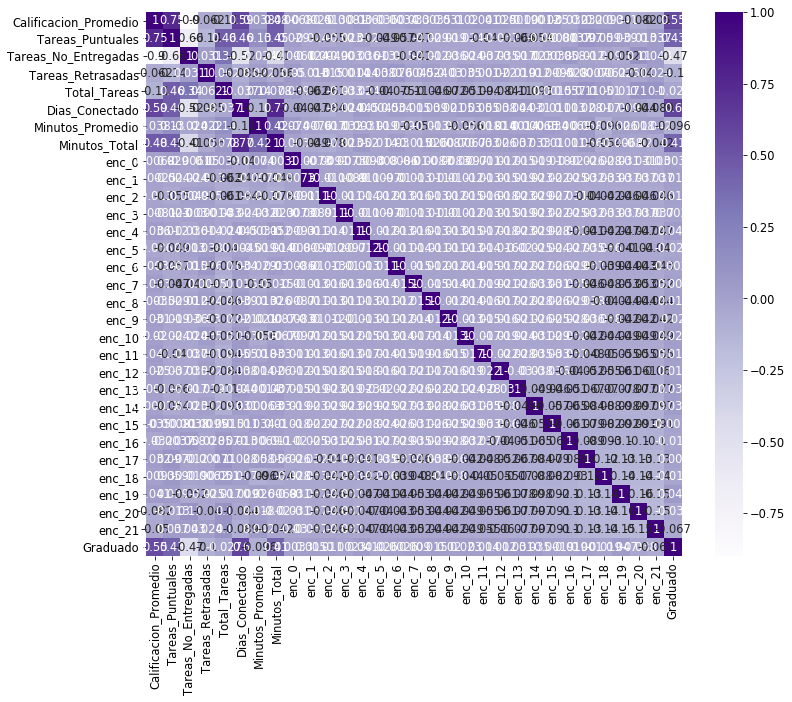

In [26]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df4.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
plt.show()

In [29]:
#Correlation with output variable
cor_target = abs(cor["Graduado"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Calificacion_Promedio    0.552986
Tareas_Puntuales         0.427524
Tareas_No_Entregadas     0.468256
Tareas_Retrasadas        0.100684
Dias_Conectado           0.597712
Minutos_Total            0.414510
Graduado                 1.000000
Name: Graduado, dtype: float64

In [30]:
df4 = df4.drop(columns=['Total_Tareas', 'Minutos_Promedio'], inplace=False)

In [33]:
target_label = pd.DataFrame(le.inverse_transform(df4['Graduado']))
df4.drop(columns=['Graduado'], inplace=True)
df4['Graduado'] = target_label

### Balance de datos

### Oversampling

In [34]:
baldata = OverSamplingDataSet(target='Graduado')

In [35]:
baldata.fit(X=df4)
#df_test_under = df_test.transform(X=df3)

df5 = pd.DataFrame.from_records(
    data=baldata.transform(
        X=df4
    ),
)

No graduados: 1280
Graduados: 1280
Proportion: 1.0 : 1


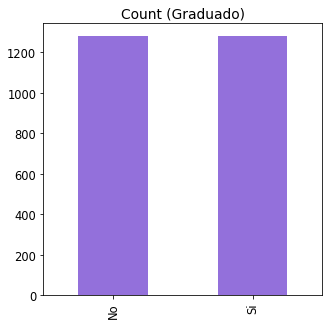

In [36]:
target_count = df5.Graduado.value_counts()

print('No graduados:', target_count['No'])
print('Graduados:', target_count['Si'])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Graduado)', color='mediumpurple');

In [87]:
features_columns = np.array(df5.columns)
features_columns = np.delete(features_columns, np.where(features_columns == 'Graduado'))
len(features_columns)

28

In [88]:
features = df5[
    features_columns
]
target = df5['Graduado']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.99, random_state=0)

In [40]:
sc = StandardScaler()
X_train.iloc[:, :8] = sc.fit_transform(X_train.iloc[:, :8])
X_test.iloc[:, :8] = sc.transform(X_test.iloc[:, :8])

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
X_test.head()

In [ ]:
print('Resampled dataset shape %s' % Counter(y_train))

In [ ]:
clf = RandomForestClassifier()

parameters = {'n_estimators': [10, 30, 60, 90, 100], 
              'max_features': [3, 5, 'log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [15, 50, 75],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }


In [ ]:
clf = ExtraTreesClassifier()

parameters = {'n_estimators': [60, 90, 100],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [50, 75, 100],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

In [ ]:
clf = SVC()

parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
             }

In [ ]:
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

<hr>
#### ModelTest

Sin OverSampling

RandomForestClassifier(max_features='log2', min_samples_split=5)

Con OverSampling

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=5, min_samples_split=3, n_estimators=90)

RandomForestClassifier(max_depth=75, max_features='sqrt', min_samples_split=3)

ExtraTreesClassifier(max_depth=50, max_features='sqrt', n_estimators=60)

SVC(C=100, gamma=1)
<hr>

In [83]:
#classifier = ExtraTreesClassifier(max_depth=50)
classifier = ExtraTreesClassifier(max_depth=75, max_features='sqrt')
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [81]:
print(all_accuracies)

[0.86829268 0.87804878 0.85365854 0.86829268 0.88780488 0.86341463
 0.88292683 0.87804878 0.88235294 0.8872549 ]


In [82]:
print(all_accuracies.mean())

0.8750095648015304


In [44]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)  

classifier = ExtraTreesClassifier(max_depth=75, max_features='sqrt')
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

In [45]:
print(all_accuracies)

[0.9015748  0.86614173 0.85826772 0.87007874 0.90513834 0.85770751
 0.88932806 0.91304348 0.90513834 0.86166008]


In [46]:
print(all_accuracies.mean())

0.8828078802402664


### Dividiendo nuestro dataset en set de Entrenamiento 85% y Pruebas 15%

In [89]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=337, stratify=target, shuffle=True)

In [ ]:
X_train.head()

In [90]:
sc = StandardScaler()
X_train.iloc[:, :8] = sc.fit_transform(X_train.iloc[:, :8])
X_test.iloc[:, :8] = sc.transform(X_test.iloc[:, :8])

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [91]:
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({'No': 1024, 'Si': 1024})


### Entrenando un modelo ``RandomForestClassifier()``

In [95]:
dtc = ExtraTreesClassifier(max_depth=50)
dtc.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=50)

<BarContainer object of 28 artists>

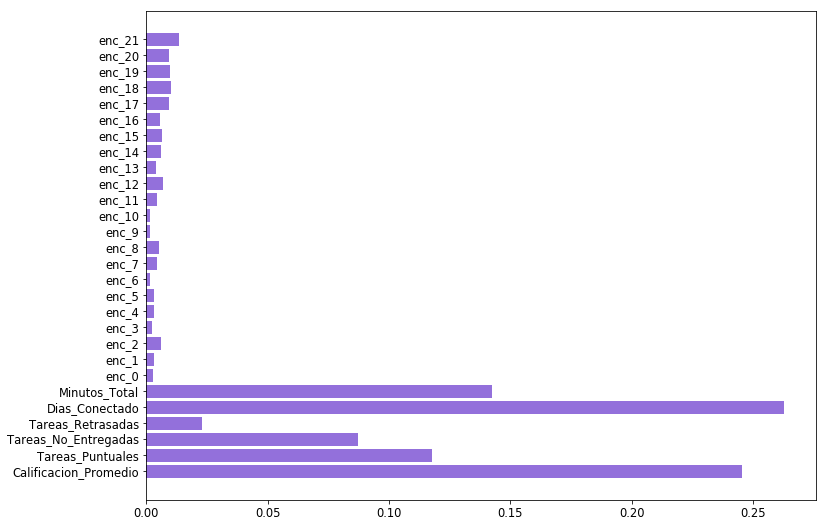

In [96]:
plt.rcParams.update({'figure.figsize': (12.0, 9.0)})

plt.barh(features_columns, dtc.feature_importances_, color='mediumpurple')

### Haciendo predicciones del Sample Test

### Analice la calidad del modelo a través de la matriz de confusión

In [97]:
y_pred = dtc.predict(X_test)

### Metricas

In [98]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[230  26]
 [ 33 223]]
              precision    recall  f1-score   support

          No       0.87      0.90      0.89       256
          Si       0.90      0.87      0.88       256

    accuracy                           0.88       512
   macro avg       0.89      0.88      0.88       512
weighted avg       0.89      0.88      0.88       512

0.884765625


### Matriz de confusión

Text(0.5, 48.0, 'Predicted label\n\nAccuracy=0.885\nPrecision=0.896\nRecall=0.871\nF1 Score=0.8831683168316832')

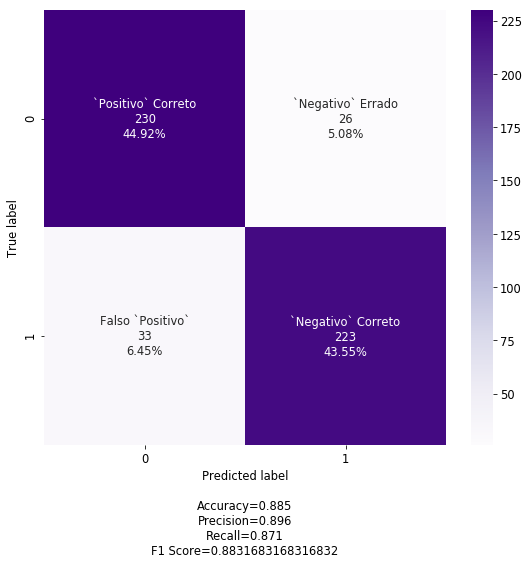

In [99]:
plt.rcParams.update({'figure.figsize': (9.0, 8.0)})

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap=plt.cm.Purples)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

<hr>

## Scoring de la data requerida para hacer la entrega de la solución

Para el envío, necesita clasificar el siguiente dataset. Para hacer eso, usted necesita reproducir los mismos pasos de pre-procesamiento para que el dataset este en la misma estructura del que usted uso para construir su modelo. Despues de clasificar este dataframe, esperamos que usted entregue un archivo csv con las 2499 filar y una columna 'Graduado' con su predicción. **No cambie el orden del archivo a predecir ni borre filas**

In [55]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
df_to_be_predicted = pd.read_csv(r'ToBePredicted.csv')
df_to_be_predicted.tail()

--2020-09-11 20:36:55--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33892 (33K) [text/plain]
Saving to: ‘ToBePredicted.csv’

100%[======================================>] 33,892      --.-K/s   in 0.001s  

2020-09-11 20:36:55 (24.8 MB/s) - ‘ToBePredicted.csv’ saved [33892/33892]



,studentId,reducido,ciclo
995,79594.0,Diagn. Psicoped.,2019 - 05
996,69470.0,Ventas Estrat.,2018 - 08
997,72921.0,Big Data,2019 - 02
998,80608.0,Interv. Psicoped,2019 - 05
999,86966.0,Interv. Psicoped,2019 - 07


In [ ]:
df_base_for_training.info()

In [63]:
# Uniendo los dataset

dfinal = pd.merge(
    df_to_be_predicted, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

dfinal = pd.merge(
    dfinal, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

dfinal.tail()

,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
995,91291.0,Trastornos Alimen.,2019 - 08,0.000,0.0,12.0,0.0,12.0,3.0,25.723333,77.17
996,91312.0,Marca Personal,2019 - 08,76.580,5.0,0.0,0.0,5.0,41.0,154.851951,6348.93
997,91329.0,Adm. Salud,2019 - 08,86.410,13.0,0.0,0.0,13.0,36.0,421.847222,15186.50
998,91345.0,Direc. Proy.,2019 - 08,0.000,0.0,9.0,0.0,9.0,6.0,14.650000,87.90
999,91437.0,Des. Neg. y Empren.,2019 - 08,75.024,15.0,0.0,0.0,15.0,42.0,112.868333,4740.47


In [64]:
dfinal = dfinal.drop(columns=['studentId', 'reducido', 'Total_Tareas', 'Minutos_Promedio'], inplace=False)
dfinal.head(10)

,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Dias_Conectado,Minutos_Total
0,2017 - 04,76.111111,9.0,0.0,0.0,34.0,11131.07
1,2017 - 03,0.000000,1.0,11.0,0.0,3.0,1161.83
2,2017 - 03,81.666667,12.0,2.0,1.0,36.0,20028.96
3,2017 - 03,81.952667,13.0,2.0,0.0,30.0,15440.67
4,2017 - 04,81.917000,9.0,1.0,0.0,17.0,746.95
5,2017 - 03,71.295556,8.0,1.0,0.0,9.0,1944.09
6,2017 - 04,83.167000,9.0,1.0,0.0,26.0,3420.07
7,2017 - 04,0.833333,1.0,11.0,0.0,5.0,176.14
8,2017 - 04,11.111111,1.0,8.0,0.0,8.0,5317.13
9,2017 - 04,37.036667,4.0,5.0,0.0,9.0,1258.75


In [65]:
scaler_columns = np.array(dfinal.columns)
scaler_columns = np.delete(scaler_columns, np.where(scaler_columns == 'ciclo'))

dfinal_s = dfinal.copy()

features = dfinal[scaler_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

dfinal_s[scaler_columns] = features

dfinal_s.head()

,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Dias_Conectado,Minutos_Total
0,2017 - 04,0.195616,0.067040,-0.595005,-0.261734,-0.466361,-0.086940
1,2017 - 03,-2.495489,-1.979983,2.330813,-0.261734,-1.402888,-1.085596
2,2017 - 03,0.392047,0.834674,-0.063038,1.305535,-0.405939,0.804395
3,2017 - 03,0.402159,1.090552,-0.063038,-0.261734,-0.587203,0.344769
4,2017 - 04,0.400898,0.067040,-0.329022,-0.261734,-0.979940,-1.127156


In [66]:
enc = OneHotEncoder()
ohenc = pd.DataFrame(enc.fit_transform(dfinal_s[['ciclo']]).toarray()).add_prefix('enc_')
dfinal = dfinal_s.iloc[:, 1:].join(ohenc)
dfinal.head()

,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Dias_Conectado,Minutos_Total,enc_0,enc_1,enc_2,enc_3,...,enc_12,enc_13,enc_14,enc_15,enc_16,enc_17,enc_18,enc_19,enc_20,enc_21
0,0.195616,0.067040,-0.595005,-0.261734,-0.466361,-0.086940,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.495489,-1.979983,2.330813,-0.261734,-1.402888,-1.085596,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.392047,0.834674,-0.063038,1.305535,-0.405939,0.804395,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.402159,1.090552,-0.063038,-0.261734,-0.587203,0.344769,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.400898,0.067040,-0.329022,-0.261734,-0.979940,-1.127156,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfinal = dfinal.drop(columns=['Graduado'], axis=1)

In [67]:
y_pred = dtc.predict(dfinal)

In [68]:
dfinal['Graduado'] = y_pred ## No cambie la variable target!

In [69]:
dfinal.head()

,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Dias_Conectado,Minutos_Total,enc_0,enc_1,enc_2,enc_3,...,enc_13,enc_14,enc_15,enc_16,enc_17,enc_18,enc_19,enc_20,enc_21,Graduado
0,0.195616,0.067040,-0.595005,-0.261734,-0.466361,-0.086940,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
1,-2.495489,-1.979983,2.330813,-0.261734,-1.402888,-1.085596,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
2,0.392047,0.834674,-0.063038,1.305535,-0.405939,0.804395,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Si
3,0.402159,1.090552,-0.063038,-0.261734,-0.587203,0.344769,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Si
4,0.400898,0.067040,-0.329022,-0.261734,-0.979940,-1.127156,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [70]:
print(Counter(y_pred))

Counter({'Si': 610, 'No': 390})


### Guardando los resultados de la predicción en un archivo csv

In [ ]:
np.savetxt("results.csv", y_pred_2, delimiter=",", fmt='%s')

In [ ]:
project.save_data(file_name="results.csv", data=pd.read_csv("results.csv", header=None).to_csv(header=["TARGET"], index=False))

<hr>

## ¡Felicitaciones!

Si todo fue ejecutado sin errores, usted ya tiene un modelo basado en classificacion binaria y puede descargar sus resultados para subirlos como csv!

Para enviar su solución, ve a la página:

# https://anahuac.maratona.dev
